# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
vaccine = read_csv ('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv',
                   col_types = cols())

The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# create the df_vacc_rates here
df_vacc_rates = vaccine %>% 
                filter(mmr >=0) %>%
                group_by(state) %>%
                summarise(N = n(), 
                          total_95 = sum(mmr >= 95, na.rm = TRUE), 
                          vacc_rate = total_95 / N )


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [4]:
df_vacc_rates %>% arrange(vacc_rate)


state,N,total_95,vacc_rate
<chr>,<int>,<int>,<dbl>
Arkansas,567,2,0.003527337
Washington,1978,646,0.326592518
North Dakota,360,164,0.455555556
Maine,357,169,0.473389356
Minnesota,1593,755,0.473948525
Ohio,2919,1435,0.491606715
Arizona,1171,593,0.506404782
Oregon,806,478,0.593052109
Colorado,1507,939,0.623092236


Arkansas has the smallest fraction of schools above the CDC target vaccination rate of 95% with rate of .352%.

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [7]:
ecdf = vaccine %>%
       arrange(overall) %>%
       filter( state == "North Carolina") %>%
       mutate(rn = row_number(), fraction_of_schools = rn / max(rn))

In [8]:
ecdf %>% head

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,rn,fraction_of_schools
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1767,North Carolina,2018-19,Renaissance Montessori Sch. of Cary,NA,NA,Wake,NA,4,-1,-1.0,NA,NA,NA,35.76823,-78.74369,1,0.0004796163
1766,North Carolina,2018-19,Annunciation Catholic,NA,NA,Craven,NA,23,-1,21.7,NA,NA,NA,34.87682,-76.90448,2,0.0009592326
1765,North Carolina,2018-19,Starmount Acad of Excellence,NA,NA,Mecklenburg,NA,77,-1,40.3,NA,NA,NA,35.13929,-80.87051,3,0.0014388489
1764,North Carolina,2018-19,Spruce Pine Montessori,NA,NA,Mitchell,NA,7,-1,42.9,NA,NA,NA,35.91674,-82.06719,4,0.0019184652
1763,North Carolina,2018-19,Moyock Elementary,NA,NA,Currituck,NA,85,-1,43.5,NA,NA,NA,36.52490,-76.17366,5,0.0023980815
1762,North Carolina,2018-19,Liberty Christian,NA,NA,Durham,NA,20,-1,45.0,NA,5,NA,36.06362,-78.92544,6,0.0028776978


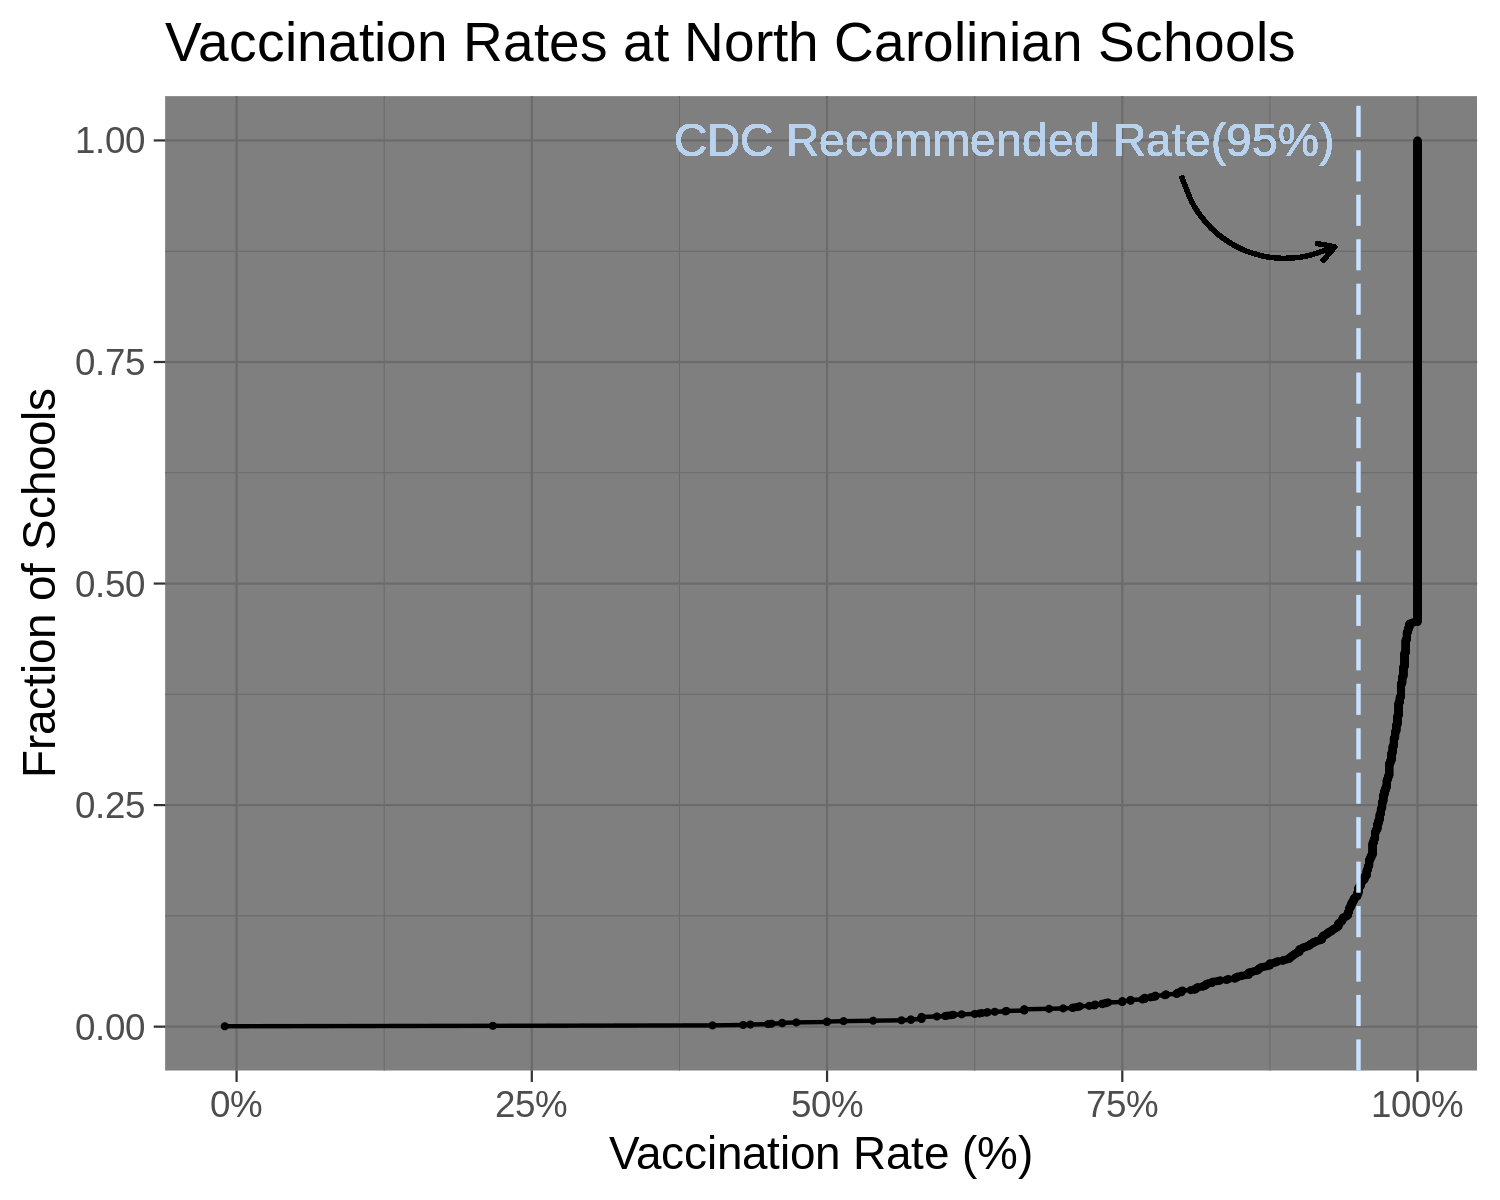

In [59]:
#Basic Plot for ECDF
p = ggplot(ecdf, aes(x = overall, y = fraction_of_schools))
p = p + geom_line() + geom_point(size = 0.25)

#vertical line for CDC rate
p = p + geom_vline(aes(xintercept = 95), 
                   color = 'slategray1', 
                   linetype = "longdash") 

#label and arrow for vertical line
p = p + geom_text(aes(x=65, 
                      label="CDC Recommended Rate(95%)",
                      y= 1), 
                  colour="slategray2")

p = p  + geom_curve(aes(x = 80, 
                        y = 0.96, 
                        xend = 93, 
                        yend = 0.88),
                     arrow = arrow(length = unit(0.02, "npc")))

#formatting
p = p + labs(x = "Vaccination Rate (%)", 
             y = "Fraction of Schools",
             title = "Vaccination Rates at North Carolinian Schools")

p = p + scale_x_continuous(labels = scales::percent_format(scale = 1))

p = p + theme_dark()

p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

In [ ]:
# ![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

Yes, the median vaccination rate for NC schools is above the CDC recommended target and seems to be close to 100%.